In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#read this file uasing pandas

df=pd.read_csv("https://raw.githubusercontent.com/tusharmanna/HousePriceprediction/refs/heads/main/housePrice.csv")


In [71]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [72]:
#check for duplicates in the above dataframe    and remove them
print(df.duplicated().sum())
print((df.duplicated().sum()/len(df))*100)
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())



208
5.978729519977005
0


In [73]:

#area is an object so we need to convert it to int \
#remove commas from area
df["Area"]=df["Area"].str.replace(",","")
df["Area"] = df["Area"].astype("int64")



In [75]:
print(df.isna().sum())
#remove missing values
df.dropna(inplace=True)
df.shape

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


(3248, 8)

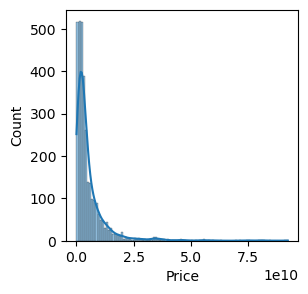

In [87]:
plt.figure(figsize=(3,3))
sns.histplot(df["Price"],kde=True,bins=100)
plt.show()


As it can be seen , Price feature is left-Skewed.
Most houses have roughly close price in one third of the first part
Outliers are obvious now(on the right side)

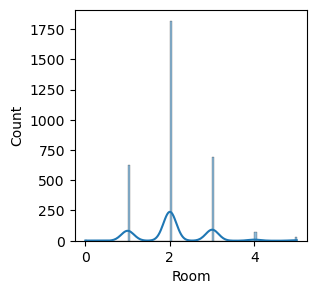

In [89]:
plt.figure(figsize=(3,3))
sns.histplot(df["Room"],kde=True,bins=100)
plt.show()

Description

About 2000 houses have exactly 2 rooms (most houses)
Distribution of 1 and 3 rooms are roughly the same (a little more 3 rooms)
we have not many houses with 4 or 5 rooms (in total about 150 houses)
houses without room is rarely seen
Conclusion

Mean of rooms is roughly 2.

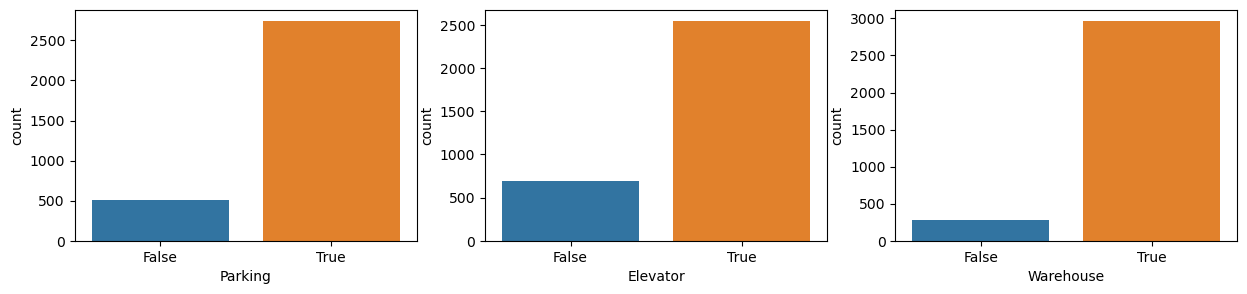

In [94]:
boolena_columns=["Parking","Elevator","Warehouse"]
plt.figure(figsize=(15,3))
for inx, col in enumerate(boolena_columns):
    plt.subplot(1,3,inx+1)
    sns.countplot(x=col,data=df)
plt.show()


Description

Most houses have Parking , Warehouse and Elevator (all these three features )
Most houses have Warehouse.(houses without warehouse are very low)
Those houses without Parking and Elevator have the same distribution(less than 1000 more than 500)

In [95]:
df["Area"].describe()


count    3.248000e+03
mean     9.365872e+06
std      3.277906e+08
min      3.000000e+01
25%      7.000000e+01
50%      9.000000e+01
75%      1.220000e+02
max      1.616000e+10
Name: Area, dtype: float64

Description

We are going to divide Area feature to 4 category : Small(0-30) - AveUnderMean(30-90) - AveUpperMean(90-120)- High(120-...)

except these features other will be replaced to nan values

Description

We are going to divide Area feature to 4 category : Small(0-30) - medium(30-90) - large(90-120)- xtralarge(120-...)

except these features other will be replaced to nan values

In [96]:
Area_new_feature=[]
for area in df["Area"]:
    if area<=30:
        Area_new_feature.append("small")
    elif area>30 and area<=90:
        Area_new_feature.append("medium")
    elif area>90 and area<=120:
        Area_new_feature.append("large")
    elif area>120:
        Area_new_feature.append("xtralarge")
    else:
        Area_new_feature.append(np.nan)

df["Area_new_feature"]=Area_new_feature

In [97]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area_new_feature,Price_new_feature
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,medium,AvgUnderMean
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,medium,AvgUnderMean
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,medium,cheap
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,large,cheap
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,xtralarge,Expensive


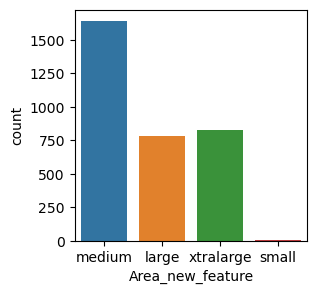

In [98]:
plt.figure(figsize=(3,3))
sns.countplot(x="Area_new_feature",data=df)
plt.show()

Description

As we can see about half of houses have between 30-90 meters(m2)
Houses with 90-120 meters have the same contribution with houses which have more than 120 meters
we can realize that right-skewed has happened.(outliers most are on the right part)
very low houeses are with less than 30 meters size

Description

we are going to determine 4 level for this feature : Cheap , AveUnderMean , AveUpperMean , Expensive

cheap : 0-25%

AveUnderMean : 25%-50%

AveUpperMean : 50%-75%

Expensive : upper 75%

In [100]:
price_new_feature=[]
H25 =df['Price'].describe()[4]
H50 =df['Price'].describe()[5]
H75 =df['Price'].describe()[6]
for price in df["Price"]:
    if price<=H25:
        price_new_feature.append("cheap")
    elif price>H25 and price<=H50:
        price_new_feature.append("AvgUnderMean")
    elif price>H50 and price<=H75:
        price_new_feature.append("AvgUpperMean")
    elif price>H75:
        price_new_feature.append("Expensive")
    else:
        price_new_feature.append("np.nan")

df["Price_new_feature"]=price_new_feature



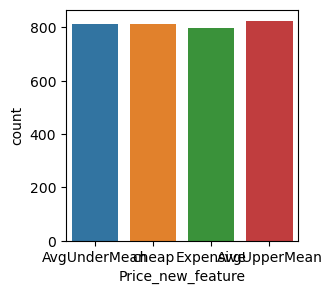

In [101]:
plt.figure(figsize=(3,3))
sns.countplot(x="Price_new_feature",data=df)
plt.show()


Description

We have very balanced distribution in 4 parts

In [102]:
duplicated_values = df[df.duplicated()]
print(f'The Number of Duplicated values : {len(duplicated_values)}')
print(f"The new shape of Dataset is : {df.shape}")
df.dtypes


The Number of Duplicated values : 0
The new shape of Dataset is : (3248, 10)


Area                   int64
Room                   int64
Parking                 bool
Warehouse               bool
Elevator                bool
Address               object
Price                float64
Price(USD)           float64
Area_new_feature      object
Price_new_feature     object
dtype: object

In [107]:
print(f"The new shape of Dataset is : {df.shape}")
df.head()

The new shape of Dataset is : (3248, 10)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area_new_feature,Price_new_feature
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,medium,AvgUnderMean
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,medium,AvgUnderMean
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,medium,cheap
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,large,cheap
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,xtralarge,Expensive


In [109]:
areanewfeature=df["Area_new_feature"].value_counts().to_frame()
areanewfeature["mean_area_price"]=df.groupby("Area_new_feature")["Price"].mean()
areanewfeature


,count,mean_area_price
Area_new_feature,,
medium,1644,2.027991e+09
xtralarge,823,1.356967e+10
large,780,4.218686e+09
small,1,5.000000e+08


In [112]:
room_feature=round(df["Room"].value_counts(normalize=True)*100).to_frame()
room_feature["mean_room_price"]=df.groupby("Room")["Price"].mean()
room_feature

,proportion,mean_room_price
Room,,
2,56.0,3.363038e+09
3,21.0,1.104311e+10
1,19.0,1.717832e+09
4,2.0,2.568122e+10
5,1.0,3.373439e+10
0,0.0,8.715556e+09


In [113]:
parking_feature=df["Parking"].value_counts().to_frame()
parking_feature["mean_parking_price"]=df.groupby("Parking")["Price"].mean()
parking_feature

,count,mean_parking_price
Parking,,
True,2745,6.162136e+09
False,503,1.745254e+09


In [114]:
warehouse_feature=df["Warehouse"].value_counts().to_frame()
warehouse_feature["mean_warehouse_price"]=df.groupby("Warehouse")["Price"].mean()
warehouse_feature


,count,mean_warehouse_price
Warehouse,,
True,2969,5.753694e+09
False,279,2.545552e+09


In [115]:
elecator_feature=df["Elevator"].value_counts().to_frame()
elecator_feature["mean_elevator_price"]=df.groupby("Elevator")["Price"].mean()
elecator_feature

,count,mean_elevator_price
Elevator,,
True,2551,5.952952e+09
False,697,3.740239e+09


In [116]:
pd.crosstab(df["Parking"],df["Room"],margins=True)


Room,0,1,2,3,4,5,All
Parking,,,,,,,
False,7,233,233,24,1,5,503
True,2,392,1586,670,67,28,2745
All,9,625,1819,694,68,33,3248


In [118]:
df.groupby(["Parking","Warehouse"])["Price"].mean()


Parking  Warehouse
False    False        2.488763e+09
         True         1.312709e+09
True     False        2.657319e+09
         True         6.286411e+09
Name: Price, dtype: float64

In [120]:
round(df.groupby(["Room","Warehouse"])["Price"].mean())


Room  Warehouse
0     False        1.912075e+10
      True         3.914000e+08
1     False        1.376320e+09
      True         1.784436e+09
2     False        1.811028e+09
      True         3.495459e+09
3     False        7.692475e+09
      True         1.114253e+10
4     False        3.673333e+09
      True         2.669697e+10
5     False        9.927857e+09
      True         4.014385e+10
Name: Price, dtype: float64

In [121]:
df["Address"].unique()


array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [123]:
len(df["Address"].unique())

192

In [126]:
Address_most_repeat=df["Address"].value_counts().head(10)
Address_most_repeat

Address
Punak                     148
West Ferdows Boulevard    133
Gheitarieh                133
Shahran                   123
Pardis                    123
Saadat Abad               120
Parand                    119
Shahr-e-Ziba               91
Jeyhoon                    88
Southern Janatabad         86
Name: count, dtype: int64

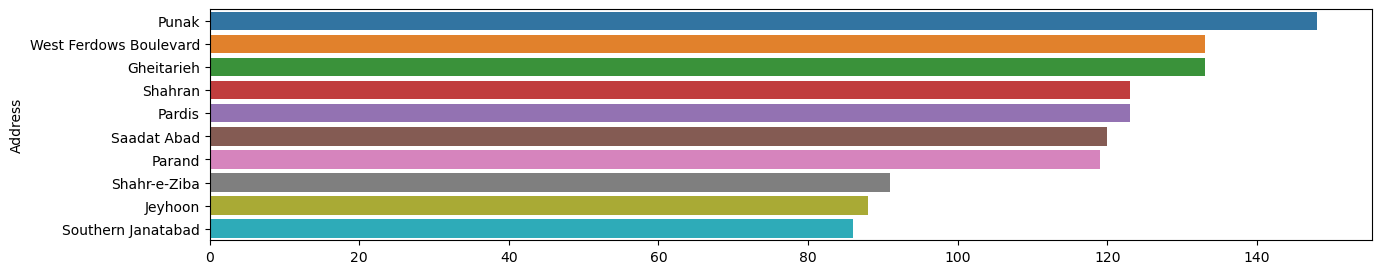

In [128]:
#   display barplot for the top 10 addresses

plt.figure(figsize=(15,3))
sns.barplot(y=Address_most_repeat.index,x=Address_most_repeat.values)
plt.show()




In [131]:
address_feature=df.groupby("Address")["Price"].mean().to_frame()
address_feature_top_ten =address_feature.sort_values("Price",ascending=False).head(10)
address_feature_top_ten

,Price
Address,
Gandhi,7.000000e+10
Lavasan,4.800000e+10
Mahmoudieh,3.346667e+10
Vanak,3.270000e+10
Elahieh,2.678635e+10
Argentina,2.516500e+10
Zaferanieh,2.357515e+10
Velenjak,2.138136e+10
Farmanieh,2.066580e+10


In [135]:
df_regular=df.copy()
df_regular["Price"]=df_regular["Price"].map('{:,.0f}'.format)
df_regular["Price(USD)"]=df_regular["Price(USD)"].map('{:,.0f}'.format)

df_regular

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area_new_feature,Price_new_feature
0,63,1,True,True,True,Shahran,"1,850,000,000","61,667",medium,AvgUnderMean
1,60,1,True,True,True,Shahran,"1,850,000,000","61,667",medium,AvgUnderMean
2,79,2,True,True,True,Pardis,"550,000,000","18,333",medium,cheap
3,95,2,True,True,True,Shahrake Qods,"902,500,000","30,083",large,cheap
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000","233,333",xtralarge,Expensive
...,...,...,...,...,...,...,...,...,...,...
3473,63,1,True,True,False,Feiz Garden,"1,890,000,000","63,000",medium,AvgUnderMean
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000","116,667",medium,AvgUpperMean
3475,83,2,True,True,True,Niavaran,"6,800,000,000","226,667",medium,Expensive
3477,105,2,True,True,True,Dorous,"5,600,000,000","186,667",large,AvgUpperMean


Model Building

In [136]:
#import ML library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder



In [137]:
#convert parking ,warehouse and elevator using LabelEncoder
le=LabelEncoder()
df["Parking"]=le.fit_transform(df["Parking"])
df["Warehouse"]=le.fit_transform(df["Warehouse"])
df["Elevator"]=le.fit_transform(df["Elevator"])
df.tail()
  


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area_new_feature,Price_new_feature
3473,63,1,1,1,0,Feiz Garden,1.890000e+09,63000.00,medium,AvgUnderMean
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67,medium,AvgUpperMean
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67,medium,Expensive
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67,large,AvgUpperMean
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00,medium,cheap


In [141]:
categoriacl_features = pd.get_dummies(df[["Address",'Area_new_feature' , "Price_new_feature"]])
df=df.merge(categoriacl_features , left_index=True , right_index=True)
df.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area_new_feature,Price_new_feature,...,Address_Zargandeh,Address_Zibadasht,Area_new_feature_large,Area_new_feature_medium,Area_new_feature_small,Area_new_feature_xtralarge,Price_new_feature_AvgUnderMean,Price_new_feature_AvgUpperMean,Price_new_feature_Expensive,Price_new_feature_cheap
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,medium,AvgUnderMean,...,False,False,False,True,False,False,True,False,False,False
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,medium,AvgUnderMean,...,False,False,False,True,False,False,True,False,False,False
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,medium,cheap,...,False,False,False,True,False,False,False,False,False,True
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,large,cheap,...,False,False,True,False,False,False,False,False,False,True
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,xtralarge,Expensive,...,False,False,False,False,False,True,False,False,True,False


In [142]:
prepared_data=df.drop(columns=["Address","Area_new_feature","Price_new_feature"])
prepared_data.head()


,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abazar,Address_Abbasabad,Address_Absard,...,Address_Zargandeh,Address_Zibadasht,Area_new_feature_large,Area_new_feature_medium,Area_new_feature_small,Area_new_feature_xtralarge,Price_new_feature_AvgUnderMean,Price_new_feature_AvgUpperMean,Price_new_feature_Expensive,Price_new_feature_cheap
0,63,1,1,1,1,1.850000e+09,61666.67,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,60,1,1,1,1,1.850000e+09,61666.67,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,79,2,1,1,1,5.500000e+08,18333.33,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,95,2,1,1,1,9.025000e+08,30083.33,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,123,2,1,1,1,7.000000e+09,233333.33,False,False,False,...,False,False,False,False,False,True,False,False,True,False


Description

Creating our X and y (X all features except Price)
Converting them to test and train

In [144]:
#get all data except price
X=prepared_data.drop(columns="Price")
y=prepared_data["Price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)




In [145]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9999999999999999

In [146]:
#create a model prediction function which accepts model and data  to predict price
def predict_price(model ):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Training_score=r2_score(y_train,model.predict(X_train))
    Testing_score=r2_score(y_test,y_pred)
    print(f"Model Name is : {model}")
    print(f"Training score is : {Training_score}")
    print(f"Testing score is : {Testing_score}")
    print(f"Mean absolute error is : {np.mean(np.abs(y_test-y_pred))}")
    print(f"Mean square error is : {np.mean((y_test-y_pred)**2)}")
    print(f"Root mean square error is : {np.sqrt(np.mean((y_test-y_pred)**2))}")
    

    


In [149]:
from sklearn.linear_model import Ridge
predict_price(Ridge())

Model Name is : Ridge()
Training score is : 0.9999999999999999
Testing score is : 0.9999999999999999
Mean absolute error is : 70.32623667597771
Mean square error is : 6931.408916150509
Root mean square error is : 83.25508342528106


C:\Users\TusharManna\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.12727e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [151]:
from sklearn.linear_model import Lasso
predict_price(Lasso())

Model Name is : Lasso()
Training score is : 0.9999999999999999
Testing score is : 0.9999999999999999
Mean absolute error is : 66.88046452724016
Mean square error is : 6640.071117506554
Root mean square error is : 81.48663152632187


In [152]:
predict_price(LinearRegression())

Model Name is : LinearRegression()
Training score is : 0.9999999999999999
Testing score is : 0.9999999999999999
Mean absolute error is : 70.86717549177317
Mean square error is : 7069.605804793393
Root mean square error is : 84.08094792991687


In [158]:
from sklearn.tree import DecisionTreeRegressor
predict_price(DecisionTreeRegressor())

Model Name is : DecisionTreeRegressor()
Training score is : 1.0
Testing score is : 0.9991267764737796
Mean absolute error is : 34551077.05846154
Mean square error is : 4.9667054923076936e+16
Root mean square error is : 222861066.41375685


In [159]:
from sklearn.ensemble import RandomForestRegressor
predict_price(RandomForestRegressor())

Model Name is : RandomForestRegressor()
Training score is : 0.999914661985629
Testing score is : 0.9998602689896151
Mean absolute error is : 17449191.617241755
Mean square error is : 7947595957796773.0
Root mean square error is : 89149290.28206995


In [160]:
from sklearn.neighbors import KNeighborsRegressor
predict_price(KNeighborsRegressor())

Model Name is : KNeighborsRegressor()
Training score is : 0.9993356425228909
Testing score is : 0.9973297734984983
Mean absolute error is : 33163338.51569231
Mean square error is : 1.5187667570200003e+17
Root mean square error is : 389713581.6237356


In [163]:
from lightgbm import LGBMRegressor
predict_price(LGBMRegressor())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 2598, number of used features: 45
[LightGBM] [Info] Start training from score 5465281788.723634
Model Name is : LGBMRegressor()
Training score is : 0.9844954243820331
Testing score is : 0.9914643773398608
Mean absolute error is : 98230732.32095154
Mean square error is : 4.8548765205481965e+17
Root mean square error is : 696769439.6676849


In [162]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.5 MB 544.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 554.9 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.5 MB 983.0 kB/s eta 0:00:02
   ------------------- -------------------- 0.7/1.5 MB 2.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.7 MB/s eta 0:00:00
